In [1]:
from libs.correlation import *

In [2]:
USER_ID = os.environ.get("USER_ID")
data_path = f"/home/{USER_ID}/mizuho/提供データ"    # これはなんか適当に変えてください
print(data_path)

/home/u01085/mizuho/提供データ


In [3]:
df_train = pd.read_csv(f"{data_path}/学習用データ.csv")
df_train.head()

,データ種類_カテゴリ_nan_Dates,リターン_目的変数関連_米国株（先物）_ESIndex,リターン_目的変数関連_米国債（先物）_TYComdty,リターン_目的変数関連_株40債券60ポート_TargetPortDailyRtn,リターン_主要指数_日本株（先物）_NKIndex,リターン_主要指数_日本債（先物）_JBComdty,リターン_主要指数_欧州株（先物）_VGIndex,リターン_主要指数_欧州債（先物）_RXComdty,リターン_主要指数_香港株（先物）_HIIndex,リターン_主要指数_EM株（指数）_MXEFIndex,原数値_クレジット系_IG トータルリターン_LUACTRUUIndex,原数値_クレジット系_IG トータルリターン(円建)_LUACTRJHIndex,原数値_クレジット系_Aaa社債 トータルリターン_LCA3TRUUIndex,原数値_クレジット系_Aa社債 トータルリターン_LCA2TRUUIndex,原数値_クレジット系_A社債 トータルリターン_LCA1TRUUIndex,原数値_クレジット系_Baa社債 トータルリターン_LCB1TRUUIndex,原数値_クレジット系_BB社債 トータルリターン_BCBATRUUIndex,原数値_クレジット系_B社債 トータルリターン_BCBHTRUUIndex,原数値_クレジット系_EM トータルリターン_EMUSTRUUIndex,原数値_米国株セクター指数_セクター指数（テクノロジー）_XLKEquity,原数値_米国株セクター指数_セクター指数（フィナンシャル）_XLFEquity,原数値_米国株セクター指数_セクター指数（ヘルスケア）_XLVEquity,原数値_米国株セクター指数_セクター指数（エネルギー）_XLEEquity,原数値_米国株セクター指数_セクター指数（一般消費財）_XLYEquity,原数値_米国株セクター指数_セクター指数（生活必需品）_XLPEquity,原数値_米国株セクター指数_セクター指数（産業財）_XLIEquity,原数値_米国株セクター指数_セクター指数（公益）_XLUEquity,原数値_米国株セクター指数_セクター指数（素材）_XLBEquity,原数値_米国株セクター指数_セクター指数（不動産）_XLREEquity,原数値_米国株セクター指数_セクター指数（通信）_XLCEquity,原数値_金利系_米金利2年_USGG2YRIndex,原数値_金利系_米金利3年_USGG3YRIndex,原数値_金利系_米金利5年_USGG5YRIndex,原数値_金利系_米金利7年_USGG7YRIndex,原数値_金利系_米金利10年_USGG10YRIndex,原数値_金利系_米金利20年_USGG20YRIndex,原数値_金利系_米金利30年_USGG30YRIndex,原数値_金利系_米金利スプレッド3年-2年_USYC2Y3YIndex,原数値_金利系_米金利スプレッド5年-2年_USYC2Y5YIndex,原数値_金利系_米金利スプレッド7年-2年_USYC2Y7YIndex,原数値_金利系_米金利スプレッド10年-2年_USYC2Y10Index,原数値_金利系_米金利スプレッド20年-2年_USYC2Y20Index,原数値_金利系_米金利スプレッド30年-2年_USYC2Y30Index,原数値_金利系_米金利スプレッド5年-3年_USYC3Y5YIndex,原数値_金利系_米金利スプレッド7年-3年_USYC3Y7YIndex,原数値_金利系_米金利スプレッド10年-3年_USYC3Y10Index,原数値_金利系_米金利スプレッド20年-3年_USYC3Y20Index,原数値_金利系_米金利スプレッド30年-3年_USYC3Y30Index,原数値_金利系_米金利スプレッド7年-5年_USYC5Y7YIndex,原数値_金利系_米金利スプレッド10年-5年_USYC5Y10Index,原数値_金利系_米金利スプレッド20年-5年_USYC5Y20Index,原数値_金利系_米金利スプレッド30年-5年_USYC5Y30Index,原数値_金利系_米金利スプレッド10年-7年_USYC7Y10Index,原数値_金利系_米金利スプレッド20年-7年_USYC7Y20Index,原数値_金利系_米金利スプレッド30年-7年_USYC7Y30Index,原数値_金利系_米金利スプレッド20年-10年_USYC1020Index,原数値_金利系_米金利スプレッド30年-10年_USYC1030Index,原数値_金利系_米金利スプレッド30年-20年_USYC2030Index,原数値_金利系_米金利バタフライ2-3-5_BF020305Index,原数値_金利系_米金利バタフライ2-3-7_BF020307Index,原数値_金利系_米金利バタフライ2-3-10_BF020310Index,原数値_金利系_米金利バタフライ2-3-20_BF020320Index,原数値_金利系_米金利バタフライ2-3-30_BF020330Index,原数値_金利系_米金利バタフライ2-5-7_BF020507Index,原数値_金利系_米金利バタフライ2-5-10_BF020510Index,原数値_金利系_米金利バタフライ2-5-20_BF020520Index,原数値_金利系_米金利バタフライ2-5-30_BF020530Index,原数値_金利系_米金利バタフライ2-7-10_BF020710Index,原数値_金利系_米金利バタフライ2-7-20_BF020720Index,原数値_金利系_米金利バタフライ2-7-30_BF020730Index,原数値_金利系_米金利バタフライ2-10-20_BF021020Index,原数値_金利系_米金利バタフライ2-10-30_BF021030Index,原数値_金利系_米金利バタフライ3-5-7_BF030507Index,原数値_金利系_米金利バタフライ3-5-10_BF030510Index,原数値_金利系_米金利バタフライ3-5-20_BF030520Index,原数値_金利系_米金利バタフライ3-5-30_BF030530Index,原数値_金利系_米金利バタフライ3-7-10_BF030710Index,原数値_金利系_米金利バタフライ3-7-20_BF030720Index,原数値_金利系_米金利バタフライ3-7-30_BF030730Index,原数値_金利系_米金利バタフライ3-10-20_BF031020Index,原数値_金利系_米金利バタフライ3-10-30_BF031030Index,原数値_金利系_米金利バタフライ5-7-10_BF050710Index,原数値_金利系_米金利バタフライ5-7-20_BF050720Index,原数値_金利系_米金利バタフライ5-7-30_BF050730Index,原数値_金利系_米金利バタフライ5-10-20_BF051020Index,原数値_金利系_米金利バタフライ5-10-30_BF051030Index,原数値_金利系_米金利バタフライ5-20-30_BF052030Index,原数値_金利系_米金利バタフライ7-10-20_BF071020Index,原数値_金利系_米金利バタフライ7-10-30_BF071030Index,原数値_金利系_米金利バタフライ7-20-30_BF072030Index,原数値_金利系_米金利バタフライ10-20-30_BF102030Index,原数値_為替系_ドルインデックス_DXYCurncy,原数値_為替系_USD/JPY_JPYCurncy,原数値_為替系_EUR/USD_EURCurncy,原数値_為替系_GBP/USD_GBPCurncy,原数値_為替系_AUD/USD_AUDCurncy,原数値_為替系_USD/CAD_CADCurncy,原数値_為替系_USD/CNY_CNYCurncy,原数値_為替系_USD/TRY_TRYCurncy,原数値_為替系_USD/BRL_BRLCurncy,リターン_商品系_ICEブレント原油（先物）_COComdty,リターン_商品系_CMX金（先物）_GCComdty,リターン_商品系_銀（先物）_SIComdty,リターン_商品系_CMX銅（先物）_HGComdty,リターン_商品系_CME材木（先物）_LBComdty,原数値_商品系_バルチック海運指数_BDIYindex,原数値_商品系_ビットコイン_XBTCurncy,原数値_その他_VIX_VIXIndex
0,1999-04-01,0.007346,-0.001362,0.002121,0.036825,0.001509,0.009022,-0.000526,0.021570,0.001105,1009.46,129.2067,257.6105,260.4925,262.9683,269.5685,596.7336,536.0065,199.0422,37.1719,20.3004,28.0000,24.5625,28.5625,26.4844,25.2031,27.2500,22.0000,NaN,NaN,5.004,5.143,5.143,NaN,5.279,NaN,5.671,NaN,10.90,NaN,33.35,Na

In [4]:
df_train = df_train[df_train['データ種類_カテゴリ_nan_Dates'] > '2011-12-31'].reset_index(drop=True)
df_train_null = df_train[['原数値_金利系_米金利バタフライ2-5-20_BF020520Index', '原数値_金利系_米金利バタフライ3-10-20_BF031020Index', '原数値_金利系_米金利バタフライ2-7-20_BF020720Index', '原数値_金利系_米金利スプレッド30年-20年_USYC2030Index', '原数値_金利系_米金利スプレッド20年-10年_USYC1020Index', '原数値_金利系_米金利バタフライ2-10-20_BF021020Index', '原数値_金利系_米金利スプレッド20年-7年_USYC7Y20Index', '原数値_金利系_米金利バタフライ3-5-20_BF030520Index', '原数値_金利系_米金利スプレッド20年-5年_USYC5Y20Index', '原数値_金利系_米金利バタフライ3-7-20_BF030720Index', '原数値_金利系_米金利スプレッド20年-3年_USYC3Y20Index', '原数値_金利系_米金利バタフライ2-3-20_BF020320Index', '原数値_金利系_米金利バタフライ5-7-20_BF050720Index', '原数値_金利系_米金利バタフライ5-10-20_BF051020Index', '原数値_金利系_米金利バタフライ5-20-30_BF052030Index', '原数値_金利系_米金利スプレッド20年-2年_USYC2Y20Index', '原数値_金利系_米金利バタフライ7-10-20_BF071020Index', '原数値_金利系_米金利バタフライ7-20-30_BF072030Index', '原数値_金利系_米金利20年_USGG20YRIndex', '原数値_金利系_米金利バタフライ10-20-30_BF102030Index', '原数値_米国株セクター指数_セクター指数（通信）_XLCEquity', '原数値_米国株セクター指数_セクター指数（不動産）_XLREEquity']]
print(df_train_null.shape)
df_tmp = df_train_null.dropna(how='all', axis=1)
df_tmp

(1305, 22)


,原数値_米国株セクター指数_セクター指数（不動産）_XLREEquity
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1300,30.33
1301,30.41
1302,30.18
1303,30.46


In [5]:
df_train = df_train[df_train['データ種類_カテゴリ_nan_Dates'] > '2011-12-31'].reset_index(drop=True)
df_train = df_train.dropna(how='any', axis=1)
print(df_train.shape)

(1305, 85)


In [6]:
df_corr = calc_correlation(df_train.iloc[:, 1:])

/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  fig.canvas.draw()
/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  fig.canvas.draw()
/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()
/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.draw()
/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  fig.canvas.draw()
/home/u00232/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH

FileNotFoundError: [Errno 2] No such file or directory: '/home/u01085/mizuho24s/data/images/heatmap_train_data.png'

/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  func(*args, **kwargs)
/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 30446 (\N{CJK UNIFIED IDEOGRAPH-76EE}) missing from current font.
  func(*args, **kwargs)
/home/u00232/anaconda3/lib/python3.10/site-packages/IPython/core/events.p

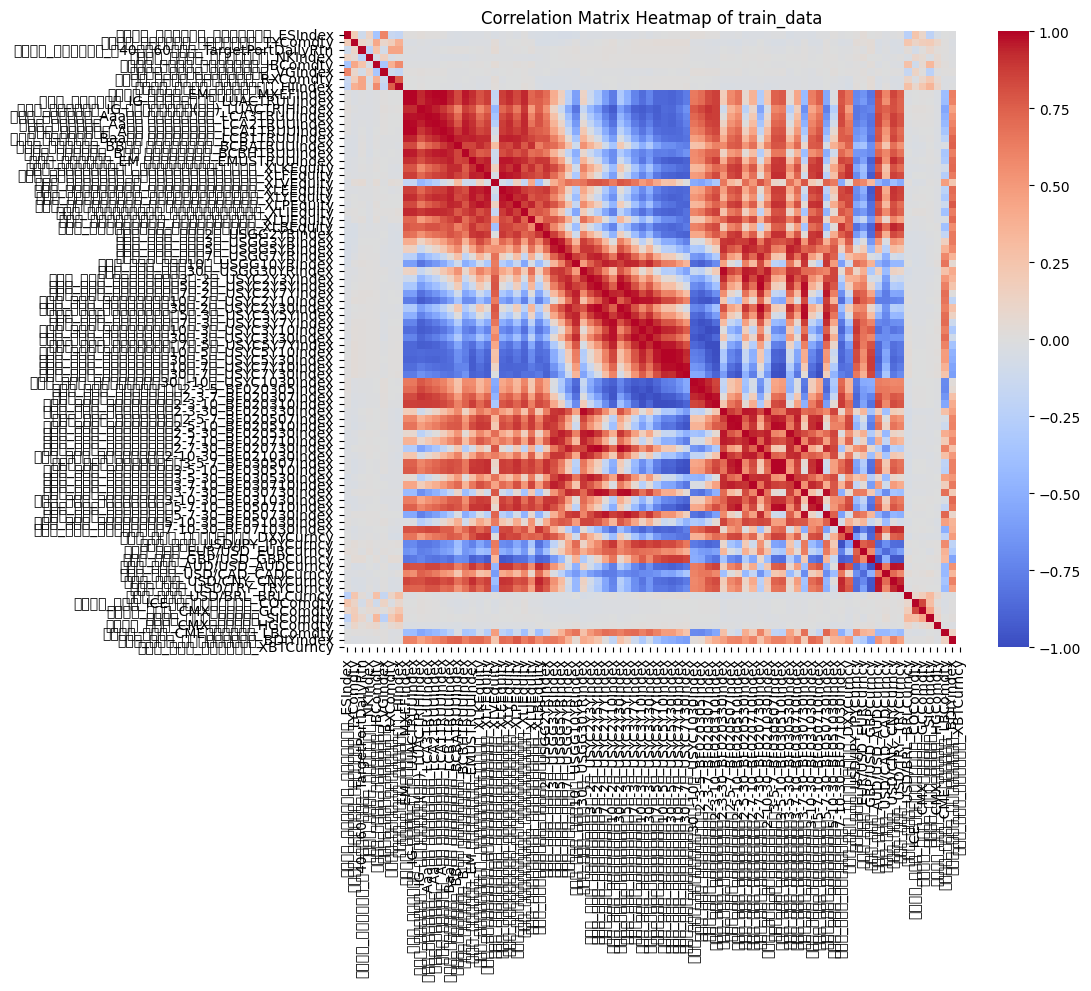

In [7]:
plot_correlation(df_corr, 'train_data')